# Insurance Prediction

In [27]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
import sqlite3

# Connect to the SQLite database file
conn = sqlite3.connect(r"C:\Users\HP\Downloads\Database.db")
# Replace ‘Database.db' with the path to your .db file if the file is in another directory.

# Create a cursor object
cursor = conn.cursor()

# Query to retrieve table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all table names
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

# Close the connection
conn.close()

Electric_cars
Fraud_detection
Heart_disease
Insurance_Prediction
TripAdviser_Reviews
Ecommerce_data
Automobile_data
Supermarket_data


In [29]:
conn = sqlite3.connect(r"C:\Users\HP\Downloads\Database.db")

In [30]:
df = pd.read_sql_query("SELECT * FROM Insurance_Prediction", conn)

In [31]:
# Train data
train_df = df.iloc[:700000].copy()

# Validation data
val_df = df.iloc[700000:900000].copy()

In [32]:
train_df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46.0,male,21.45,5.0,yes,southeast,Diabetes,,Never,Blue collar,Premium,20460.307668871566
1,25.0,female,25.38,2.0,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.8992176422
2,38.0,male,44.88,2.0,yes,southwest,,High blood pressure,Occasionally,Blue collar,Premium,20204.476301934814
3,25.0,male,19.89,0.0,no,northwest,,Diabetes,Rarely,White collar,Standard,11789.029842697417
4,49.0,male,38.21,3.0,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838159606


In [33]:
train_df.shape

(700000, 12)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   age                     700000 non-null  object
 1   gender                  700000 non-null  object
 2   bmi                     700000 non-null  object
 3   children                700000 non-null  object
 4   smoker                  700000 non-null  object
 5   region                  700000 non-null  object
 6   medical_history         700000 non-null  object
 7   family_medical_history  700000 non-null  object
 8   exercise_frequency      700000 non-null  object
 9   occupation              700000 non-null  object
 10  coverage_level          700000 non-null  object
 11  charges                 700000 non-null  object
dtypes: object(12)
memory usage: 64.1+ MB


In [35]:
# Converting Data Type
columns=['age','bmi','children','charges']
for col in columns:
  train_df[col] = train_df[col].str.strip()
  train_df[col].replace('', np.nan,inplace=True)
  train_df[col] = pd.to_numeric(train_df[col], errors='coerce')

In [36]:
# Checking for any Sapaces
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)
print('\n')
for col in categorical_cols:
    print(train_df[col].unique())
    print('\n')

['gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation', 'coverage_level']


['male' 'female' '']


['yes' 'no']


['southeast' 'northwest' 'southwest' 'northeast']


['Diabetes' '' 'High blood pressure' 'Heart disease']


['' 'High blood pressure' 'Diabetes' 'Heart disease']


['Never' 'Occasionally' 'Rarely' 'Frequently']


['Blue collar' 'White collar' 'Student' 'Unemployed' '']


['Premium' 'Standard' 'Basic']




In [37]:
# Filling spaced with mode value
columns1=['gender','medical_history','family_medical_history','occupation']
for col in columns1:
  train_df[col].replace('', np.nan, inplace=True)
  train_df[col].fillna(train_df[col].mode()[0], inplace=True)

In [38]:
# Checking Null Values
train_df.isnull().sum()

age                       27851
gender                        0
bmi                           0
children                  22470
smoker                        0
region                        0
medical_history               0
family_medical_history        0
exercise_frequency            0
occupation                    0
coverage_level                0
charges                       0
dtype: int64

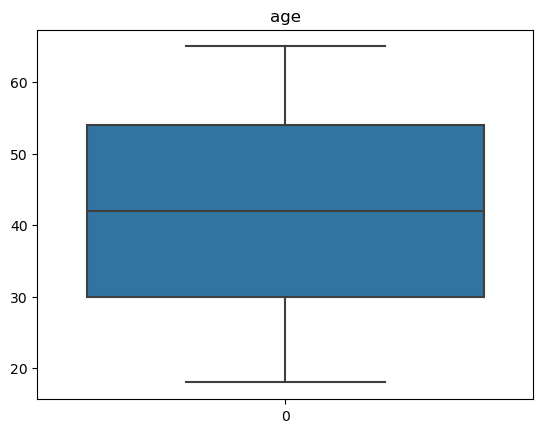

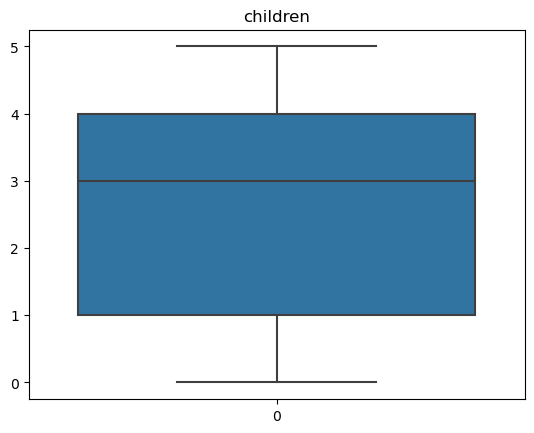

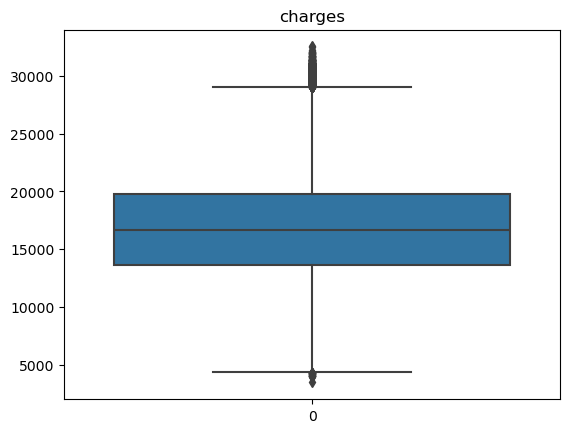

In [39]:
# Detecting Outliers
cols=['age','children','charges']
for col in cols:
  # box plot for age and children
  sns.boxplot(train_df[col])
  plt.title(col)
  plt.show()

In [40]:
# Filling missing Values
cols1=['age','children']
for col in cols1:
  train_df[col].fillna(train_df[col].mean(), inplace=True)

In [41]:
# Treating Outliers
Q1 = train_df['charges'].quantile(0.25)
Q3 = train_df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_df['charges'] = train_df['charges'].clip(lower_bound, upper_bound)

In [42]:
# Nominal encode 
train_encoded = pd.get_dummies(train_df, columns=['gender','smoker','region','medical_history','family_medical_history','occupation'], drop_first=True, dtype=int)

In [43]:
# Ordinal Encode
d1={'Never':0,'Rarely':1,'Occasionally':2,'Frequently':3}
d2={'Basic':0,'Standard':1,'Premium':2}
train_encoded['exercise_frequency'] = train_encoded['exercise_frequency'].map(d1)
train_encoded['coverage_level'] = train_encoded['coverage_level'].map(d2)

In [44]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
scales_col = ['age','bmi','children','exercise_frequency','coverage_level']
scale=MinMaxScaler()
train_encoded[scales_col]=scale.fit_transform(train_encoded[scales_col])

In [45]:
train_encoded.head()

,age,bmi,children,exercise_frequency,coverage_level,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest,medical_history_Heart disease,medical_history_High blood pressure,family_medical_history_Heart disease,family_medical_history_High blood pressure,occupation_Student,occupation_Unemployed,occupation_White collar
0,0.595745,0.107812,1.0,0.000000,1.0,20460.307669,1,1,0,1,0,0,0,1,0,0,0,0
1,0.148936,0.230625,0.4,0.666667,1.0,20390.899218,0,1,1,0,0,0,0,0,1,0,0,1
2,0.425532,0.840000,0.4,0.666667,1.0,20204.476302,1,1,0,0,1,1,0,0,1,0,0,0
3,0.148936,0.059063,0.0,0.333333,0.5,11789.029843,1,0,1,0,0,1,0,0,0,0,0,1
4,0.659574,0.631563,0.6,0.333333,0.5,19268.309838,1,1,1,0,0,0,0,0,1,0,0,1


In [46]:
# Checking correleation with target column
correleation=train_encoded.corr()['charges'].abs().sort_values(ascending=False)
print("Correleation with target\n",correleation)

Correleation with target
 charges                                       1.000000
smoker_yes                                    0.566313
coverage_level                                0.463287
exercise_frequency                            0.163854
medical_history_High blood pressure           0.132706
family_medical_history_High blood pressure    0.131897
occupation_White collar                       0.127963
occupation_Unemployed                         0.122604
medical_history_Heart disease                 0.113066
family_medical_history_Heart disease          0.112954
gender_male                                   0.111464
bmi                                           0.103767
children                                      0.075952
occupation_Student                            0.063499
age                                           0.061195
region_southwest                              0.038874
region_northwest                              0.027658
region_southeast                       

In [47]:
# Selecting Relevent column
selected_corr_features = correleation[correleation>0.01].index.tolist()
print("selected features after correlation filter\n",selected_corr_features)

selected features after correlation filter
 ['charges', 'smoker_yes', 'coverage_level', 'exercise_frequency', 'medical_history_High blood pressure', 'family_medical_history_High blood pressure', 'occupation_White collar', 'occupation_Unemployed', 'medical_history_Heart disease', 'family_medical_history_Heart disease', 'gender_male', 'bmi', 'children', 'occupation_Student', 'age', 'region_southwest', 'region_northwest']


In [48]:
# Dividing dependent and independent variables
x=train_encoded[selected_corr_features].drop(['charges'], axis=1)
y=train_encoded['charges']

In [49]:
# Spliting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [50]:
# --- Feature Selection Step 2: Lasso (L1) ---
from sklearn.linear_model import LassoCV
lasso=LassoCV(cv=5, random_state=42)
lasso.fit(x_train,y_train)

LassoCV(cv=5, random_state=42)

In [51]:
lasso_importance=pd.Series(lasso.coef_, index=x_train.columns)
selected_lasso_features=lasso_importance[lasso_importance!=0].index.tolist()
print("selected features after lasso \n", selected_lasso_features)

selected features after lasso 
 ['smoker_yes', 'coverage_level', 'exercise_frequency', 'medical_history_High blood pressure', 'family_medical_history_High blood pressure', 'occupation_White collar', 'occupation_Unemployed', 'medical_history_Heart disease', 'family_medical_history_Heart disease', 'gender_male', 'bmi', 'children', 'occupation_Student', 'age', 'region_southwest', 'region_northwest']


In [52]:
# Reduce to Lasso-selected features
x_train=x_train[selected_lasso_features]
x_test=x_test[selected_lasso_features]

In [53]:
# --- Feature Selection Step 3: RandomForest Importance ---
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [54]:
importance=pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print(importance)

smoker_yes                                    0.320343
coverage_level                                0.217317
bmi                                           0.154419
age                                           0.095670
children                                      0.040336
exercise_frequency                            0.036879
medical_history_High blood pressure           0.017269
family_medical_history_High blood pressure    0.016961
family_medical_history_Heart disease          0.016385
medical_history_Heart disease                 0.015992
occupation_White collar                       0.013918
gender_male                                   0.012812
region_southwest                              0.012258
region_northwest                              0.012075
occupation_Unemployed                         0.009470
occupation_Student                            0.007895
dtype: float64


In [55]:
# Final feature set
x_final_train=x_train[importance.index.tolist()]
x_final_test=x_test[importance.index.tolist()]

In [56]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_final_train,y_train)

LinearRegression()

In [57]:
# Prediction
y1_pred = linear_model.predict(x_final_test)

In [58]:
# Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,y1_pred))
print('MSE',mean_squared_error(y_test,y1_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y1_pred)))

MAE 2021.8676277152883
MSE 6499611.525794513
RMSE 2549.4335695982572


In [59]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_final_train,y_train)

DecisionTreeRegressor(random_state=42)

In [60]:
# Prediction
y2_pred = dt_model.predict(x_final_test)

In [61]:
# Evaluation
print('MAE',mean_absolute_error(y_test,y2_pred))
print('MSE',mean_squared_error(y_test,y2_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y2_pred)))

MAE 2678.7544098173594
MSE 13550114.080671057
RMSE 3681.0479595722545


In [62]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
xg_model = GradientBoostingRegressor(random_state=42)
xg_model.fit(x_final_train,y_train)

GradientBoostingRegressor(random_state=42)

In [63]:
# Prediction
y3_pred = xg_model.predict(x_final_test)

In [64]:
# Evaluation
print('MAE',mean_absolute_error(y_test,y3_pred))
print('MSE',mean_squared_error(y_test,y3_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y3_pred)))

MAE 2028.4474102304177
MSE 6497845.900930314
RMSE 2549.087268206076


In [65]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_final_train,y_train)

RandomForestRegressor(random_state=42)

In [66]:
# Prediction
y4_pred = rf_model.predict(x_final_test)

In [67]:
# Evalution
print('MAE',mean_absolute_error(y_test,y4_pred))
print('MSE',mean_squared_error(y_test,y4_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y4_pred)))

MAE 2112.78735274677
MSE 7203004.658337452
RMSE 2683.8413996243244


In [68]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
neigh_model = KNeighborsRegressor(n_neighbors=5)
neigh_model.fit(x_final_train,y_train)

KNeighborsRegressor()

In [69]:
# Prediction
y5_pred = neigh_model.predict(x_final_test)

In [70]:
# Evaluation
print('MAE',mean_absolute_error(y_test,y5_pred))
print('MSE',mean_squared_error(y_test,y5_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y5_pred)))

MAE 2147.9763058563635
MSE 7759124.582103021
RMSE 2785.520522649765


# Evaluation

In [77]:
# Validation data
val_df = df.iloc[700000:900000].copy()

In [78]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 700000 to 899999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   age                     200000 non-null  object
 1   gender                  200000 non-null  object
 2   bmi                     200000 non-null  object
 3   children                200000 non-null  object
 4   smoker                  200000 non-null  object
 5   region                  200000 non-null  object
 6   medical_history         200000 non-null  object
 7   family_medical_history  200000 non-null  object
 8   exercise_frequency      200000 non-null  object
 9   occupation              200000 non-null  object
 10  coverage_level          200000 non-null  object
 11  charges                 200000 non-null  object
dtypes: object(12)
memory usage: 18.3+ MB


In [79]:
# Preprocessing

columns2=['age','bmi','children','charges']
for col in columns2:
  val_df[col] = val_df[col].str.strip()
  val_df[col].replace('', np.nan,inplace=True)
  val_df[col] = pd.to_numeric(val_df[col], errors='coerce')

columns3=['gender','medical_history','family_medical_history','occupation']
for col in columns3:
  val_df[col].replace('', np.nan, inplace=True)
  val_df[col].fillna(val_df[col].mode()[0], inplace=True)

cols3=['age','children']
for col in cols3:
  val_df[col].fillna(val_df[col].mean(), inplace=True)

# Treating Outliers
Q1 = val_df['charges'].quantile(0.25)
Q3 = val_df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
val_df['charges'] = val_df['charges'].clip(lower_bound, upper_bound)

# Nomianl encode 
val_encoded = pd.get_dummies(val_df, columns=['gender','smoker','region','medical_history','family_medical_history','occupation'], drop_first=True, dtype=int)

# Ordinal Encoding
d3={'Never':0,'Rarely':1,'Occasionally':2,'Frequently':3}
d4={'Basic':0,'Standard':1,'Premium':2}
val_encoded['exercise_frequency'] = val_encoded['exercise_frequency'].map(d3)
val_encoded['coverage_level'] = val_encoded['coverage_level'].map(d4)

# MinMax Scaling
scales_col1 = ['age','bmi','children','exercise_frequency','coverage_level']
scale1=MinMaxScaler()
val_encoded[scales_col1]=scale.fit_transform(val_encoded[scales_col1])

# Final Features
x_val_final=val_encoded[x_final_train.columns.tolist()]
y_val = val_encoded['charges']

In [84]:
# Linear Regressor
y1_val = linear_model.predict(x_val_final)

# Evaluation Metrics
print('MAE',mean_absolute_error(y_val,y1_val))
print('MSE',mean_squared_error(y_val,y1_val))
print('RMSE',np.sqrt(mean_squared_error(y_val,y1_val)))

MAE 1935.1565424066291
MSE 5903845.469904596
RMSE 2429.78300881058


In [85]:
# Decision Tree Regressor
y2_val = dt_model.predict(x_val_final)

# Evaluation Metrics
print('MAE',mean_absolute_error(y_val,y2_val))
print('MSE',mean_squared_error(y_val,y2_val))
print('RMSE',np.sqrt(mean_squared_error(y_val,y2_val)))

MAE 2550.185279009238
MSE 11952039.147786772
RMSE 3457.1721316397848


In [86]:
# GradientBoostingRegressor
y3_val = xg_model.predict(x_val_final)

# Evaluation Metrics
print('MAE',mean_absolute_error(y_val,y3_val))
print('MSE',mean_squared_error(y_val,y3_val))
print('RMSE',np.sqrt(mean_squared_error(y_val,y3_val)))

MAE 1957.0199642658808
MSE 6005515.229483047
RMSE 2450.615275697727


In [87]:
# RandomForestRegressor
y4_val = rf_model.predict(x_val_final)

# Evaluation Metrics
print('MAE',mean_absolute_error(y_val,y4_val))
print('MSE',mean_squared_error(y_val,y4_val))
print('RMSE',np.sqrt(mean_squared_error(y_val,y4_val)))

MAE 2037.4379085840997
MSE 6620933.696051183
RMSE 2573.1175052941485


In [88]:
# KNeighborsRegressor
y5_val = neigh_model.predict(x_val_final)

# Evaluation Metrics
print('MAE',mean_absolute_error(y_val,y5_val))
print('MSE',mean_squared_error(y_val,y5_val))
print('RMSE',np.sqrt(mean_squared_error(y_val,y5_val)))

MAE 2027.909369820422
MSE 6816875.2658990575
RMSE 2610.9146416340495


In [89]:
import joblib

# 1. Store all models and their F1-scores (calculated on validation set)
model_results = {
    'Linear Regressor': {'model': linear_model, 'RMSE': np.sqrt(mean_squared_error(y_val,y1_val))},
    'Decision Tree Regressor': {'model': dt_model, 'RMSE': np.sqrt(mean_squared_error(y_val,y2_val))},
    'GradientBoostingRegressor': {'model': xg_model, 'RMSE': np.sqrt(mean_squared_error(y_val,y3_val))},
    'RandomForestRegressor': {'model': rf_model, 'RMSE': np.sqrt(mean_squared_error(y_val,y4_val))},
    'KNeighborsRegressor': {'model': neigh_model, 'RMSE': np.sqrt(mean_squared_error(y_val,y5_val))}
}

In [102]:
# 2. Find the model with the lowest Root Mean Square Error
best_model_name = None
best_model = None
best_model_rmse = float('inf')  # Start with infinity (since we want the minimum)

for name, result in model_results.items():
    if result['RMSE'] < best_model_rmse:  # Check for smaller RMSE
        best_model_rmse = result['RMSE']
        best_model = result['model']
        best_model_name = name

# 3. Print the best model
print(f"\n✅ Best Model: {best_model_name} with RMSE Score: {best_model_rmse:.4f}")


✅ Best Model: Linear Regressor with RMSE Score: 2429.7830


In [103]:
# 4. Save the best model and preprocessing details
#    We save three things:
#    - The trained best model
#    - The scaler used during training (so scaling is consistent)
#    - The list of feature names (to keep column order same in production)
save_data = {
    'model': best_model,
    'scaler': scale,
    'selected_features': x_final_train.columns.tolist()
}

In [104]:
# Save everything into one file using joblib
joblib.dump(save_data, 'best_Insurance_Prediction_model.joblib')
print("\n✅ Model and preprocessing steps saved in 'best_Insurance_Prediction_model.joblib'")


✅ Model and preprocessing steps saved in 'best_Insurance_Prediction_model.joblib'
